<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
def exponencial(lmda=1):
  return float(-np.log(np.random.uniform()))/lmda


n = 1000

0.23118359922212153

# Exercício 1
Considere a integral
$$
    \theta = \int_0^1 \frac{1}{1+x^2} \,\ dx = \frac{\pi}{4}.
$$

### Tarefas

1. Implemente uma simulação de Monte Carlo para estimar $\pi$ a partir da expressão acima.

2. Proponha uma variável de controle adequada e derive o estimador controlado.  

3. Compare, via simulação, as estimativas obtidas com e sem variável de controle e a variância dos estimadores.


#Resolução:

tomaremos $X^2$ como variável de controle.

coeficiente:
$$
c^* = - \frac{Cov(\frac{1}{1+X^2}, X^2)}{Var(X)} = -\frac{1- \frac{\pi}{4} - \frac{\pi}{4}\frac{1}{3}}{\frac{4}{45}} = -\frac{45}{4}(1- \frac{\pi}{3})
$$


duas observações:
- aqui e nos demais exercícios os cálculos das esperanças para a covariância e variância serão omitidos.
- me empolguei com o uso de funções anônimas quando descobri que podia explicitar o argumento logo após defini-las e isso me levou a criar um codigo bem "sujo", criando confusão no que podia ser simples :)

In [66]:
estimativas_MC1 = []
estimativas_controle1 = []
c = - (45 / 4)*(1 - np.pi/3)

for _ in range(n):
  estimativas_MC1.append(4*sum(1/(1+np.random.uniform()**2) for _ in range(n)) / n)
  estimativas_controle1.append(4*sum((lambda x: (1/(1+x**2) + c*(x**2 - 1/3)))(np.random.uniform()) for _ in range(n))/n)


Variância aplicando Monte Carlo diretamente:  0.00040496224144810096
Variância usando Variável de Controle:  1.287089259281754e-05


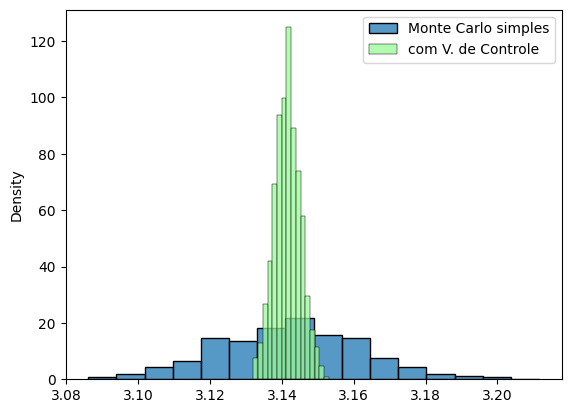

In [67]:
print("Variância aplicando Monte Carlo diretamente: ",np.var(estimativas_MC1))
print("Variância usando Variável de Controle: ",np.var(estimativas_controle1))
sns.histplot(estimativas_MC1, bins=16, stat='density', label="Monte Carlo simples")
sns.histplot(estimativas_controle1,bins=16, stat='density', label="com V. de Controle", color="palegreen")
plt.legend()


# Exercício 2

Desenvolva o exemplo 21 das nossas notas de aula. Compare as estimativas do método com e sem controle e compare as variâncias dos estimadores.



##Exemplo 21:

queremos estimar
$$
\theta = \int_0^1 e^x \,\ dx = e - 1
$$

o estimador simples de Monte Carlo é
$$
\hat{\theta}_{MC} = \frac{1}{n}\sum_{i=1}^n e^{x_i} ,  
$$
em que $x_i$ vem de $X \sim Uniforme(0,1)$.

Como visto no exemplo, o estimador com variável de controle é
$$
\hat{\theta}_{ctrl} = \frac{1}{n} \sum_{i=1}^n e^{x_i} + c^*(x_i - \frac{1}{2}),
$$

em que $c^* = -\dfrac{cov(e^X,X)}{var(X)} = -\dfrac{1-\frac{1}{2}(e-1)}{\frac{1}{12}} = 6(e-3). $

In [14]:
estimativas_MC2 =[]
estimativas_controle2 = []
c = 6*(np.e - 3)
for _ in range(n):
  estimativas_MC2.append(sum(np.exp(np.random.uniform()) for _ in range(n))/n)
  estimativas_controle2.append(sum((lambda x: (np.exp(x) + c*(x-0.5)))(np.random.uniform()) for _ in range(n)) /n)

Variância aplicando Monte Carlo diretamente:  0.00023673458800661028
Variância usando Variável de Controle:  4.121483939398683e-06


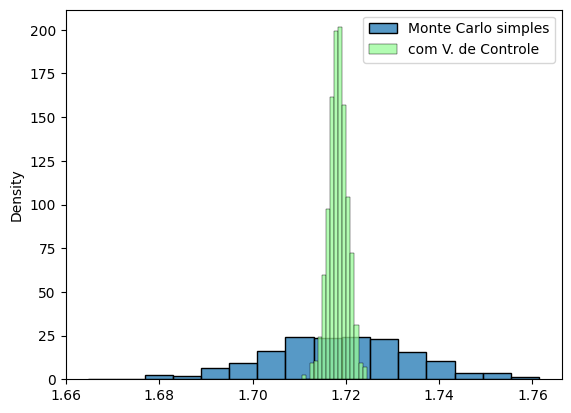

In [21]:
print("Variância aplicando Monte Carlo diretamente: ",np.var(estimativas_MC2))
print("Variância usando Variável de Controle: ",np.var(estimativas_controle2))
sns.histplot(estimativas_MC2, bins=16, stat='density', label="Monte Carlo simples")
sns.histplot(estimativas_controle2,bins=16, stat='density', label="com V. de Controle", color="palegreen")
plt.legend()

## Exercício 3

Considere a variável aleatória $X \sim \mathrm{Exp}(1)$. Queremos estimar

$$
\theta = \mathbb{P}(X > 1) = e^{-1}.
$$

### Tarefas

1. Implemente um estimador de Monte Carlo para $\theta$ usando  
$$
\hat{\theta}_{\text{MC}} = \frac{1}{n} \sum_{i=1}^n \mathbf{1}\{X_i > 1\}.
$$

2. Escolha uma variável de controle adequada, derive o estimador controlado e escreva sua forma final.,

3. Compare, via simulação, as variâncias dos estimadores com e sem variável de controle.



#Resolução:



usaremos a própria X como variável de controle.
coeficiente:
$$
c^* = -\frac{cov(\mathbf{1}\{X>1\}, X)}{var(X)} = - \frac{2e^{-1} - 1e^{-1}}{1} = -e^{-1}
$$

In [47]:
estimativas_MC3 = []
estimativas_controle3 = []
c3 = -np.exp(-1)
for _ in range(n):
  estimativas_MC3.append(sum(1 if exponencial() > 1 else 0 for _ in range(n)) /n)
  estimativas_controle3.append(sum((lambda x: ((1 if x > 1 else 0) + c3*(x-1)))(exponencial()) for _ in range(n))/n)

Variância aplicando Monte Carlo diretamente:  0.0002204920390000002
Variância usando Variável de Controle:  0.00010190449372369377


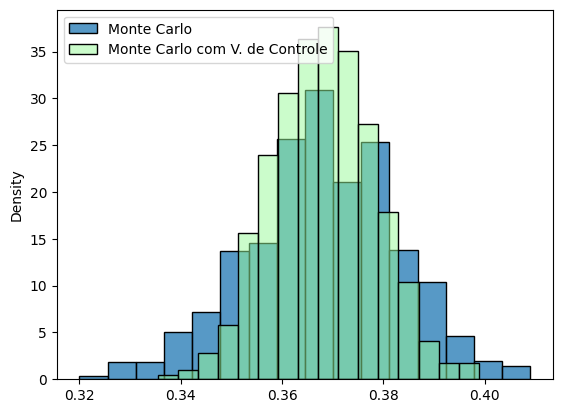

In [61]:
print("Variância aplicando Monte Carlo diretamente: ",np.var(estimativas_MC3))
print("Variância usando Variável de Controle: ",np.var(estimativas_controle3))


sns.histplot(estimativas_MC3, bins=16, label="Monte Carlo", stat='density')
sns.histplot(estimativas_controle3, bins=16, label="Monte Carlo com V. de Controle", color="palegreen", stat='density', alpha=0.5)
plt.legend()